<a href="https://colab.research.google.com/github/asyrofist/tugasKK1_Ontology/blob/master/tugas_KK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ontology Contruction Process

## Original Corpus

In [0]:
# Clone the entire repo.
!git clone -l -s https://github.com/asyrofist/tugasPKPL.git cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
cloned-repo  PKPL.ipynb  sklearn   srs3.csv
nltk	     README.md	 srs2.csv  TPOT.ipynb


## Text Prprocessing

In [0]:
import pandas as pd
from time import time

print("Loading Dataset...")
t0 = time()
dataset2 = pd.read_csv('/content/cloned-repo/srs2.csv')
print("done in %0.3fs." % (time() - t0))
dataset2.head(n = 100)

Loading Dataset...
done in 0.009s.


,ID,Requirement Statement
0,F01,Users can create a new diary.
1,F02,Users can add titles to the diary.
2,F03,Users can add weather to the diary.
3,F04,Users can add dates to the diary.
4,F06,Users can add hours to the diary.
5,F07,Users can add seconds to the diary.
6,F08,Users can save diaries.
7,F09,Users can add photos to the diary.
8,F10,Users can read the diary that has been created.
9,F11,Users can share diaries in the form of postcards.


In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import nltk
import string
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
import re 

stemming = PorterStemmer()
stops = set(stopwords.words("english"))

# cleaning text
def text_cleaning(raw):
  
  # lowering word
  lower_case = raw.lower()

  # hapus punctuatioation & lower
  hasil_punctuation = lower_case.translate(str.maketrans("","",string.punctuation))
  
  # hapus whitespace
  hasil_whitespace = hasil_punctuation.strip()

  # hapus angka
  hasil_hapusangka = re.sub(r"\d+", "", hasil_whitespace)
  
  # tokenisasi 
  tokens = nltk.tokenize.word_tokenize(hasil_hapusangka)
  
  # Stemming
  stemmed_words = [stemming.stem(w) for w in tokens]
  
  # Remove stop words
  meaningful_words = [w for w in stemmed_words if not w in stops]
  
  # Rejoin meaningful stemmed words
  joined_words = ( " ".join(meaningful_words))
  
  # Return cleaned data
  return joined_words  

# applying
def apply_cleaning(hasil):
    cleaned_hasil = []
    for element in hasil:
        cleaned_hasil.append(text_cleaning(element))
    return cleaned_hasil

# Load data example (dari functional maupun nonfunctional)
statement = dataset2

# Truncate data for example
statement = statement.head(100)

# Get text to clean (dari row yang diinginkan)
text_to_clean = list(statement['Requirement Statement'])

# Clean text
print("Loading Original & Cleaned Text...")
t0 = time()
cleaned_text = apply_cleaning(text_to_clean)

# Show first example
print("done in %0.3fs." % (time() - t0))
pd.DataFrame([text_to_clean, cleaned_text],index=['ORIGINAL','CLEANED'],columns=statement['ID'])

Loading Original & Cleaned Text...
done in 0.017s.


ID,F01,F02,F03,F04,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,NF01,NF02,NF03,NF04,NF05,NF06,NF07,NF08,NF09
ORIGINAL,Users can create a new diary.,Users can add titles to the diary.,Users can add weather to the diary.,Users can add dates to the diary.,Users can add hours to the diary.,Users can add seconds to the diary.,Users can save diaries.,Users can add photos to the diary.,Users can read the diary that has been created.,Users can share diaries in the form of postcards.,Users can save postcards.,Users can change the postcard background color.,Users can change the color of posts on the pos...,Users can delete the diary.,Users can edit the diary that has been created.,Users can open a calendar that contains a diary.,The system can open a diary editor.,The application has a high level of availabili...,Applications must have a high degree of flexib...,This application must have a high level of int...,This application has a high usability aspect a...,This application must have a response time val...,Applications must have a high level of interop...,Documentation must be included in the system s...,The application must have a high degree of fle...,The modules in the system will be designed and...
CLEANED,user creat new diari,user add titl diari,user add weather diari,user add date diari,user add hour diari,user add second diari,user save diari,user add photo diari,user read diari ha creat,user share diari form postcard,user save postcard,user chang postcard background color,user chang color post postcard,user delet diari,user edit diari ha creat,user open calendar contain diari,system open diari editor,applic ha high level avail oper continu seven ...,applic must high degre flexibilitywhich must a...,thi applic must high level integr data secur i...,thi applic ha high usabl aspect easi use inter...,thi applic must respons time valu quit good fa...,applic must high level interoperabilitybecaus ...,document must includ system sourc code develop...,applic must high degre flexibilityand use user...,modul system design program structur way conti...


## Frequent itemset Mining BOW

In [0]:
print("Loading Counting Vector...")
t0 = time()

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(cleaned_text)

print(count_vector)
print("done in %0.3fs." % (time() - t0))

Loading Counting Vector...
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=['user creat new diari', 'user add titl diari',
                       'user add weather diari', 'user add date diari',
                       'user add hour diari', 'user add second diari',
                       'user save diari', 'user add photo diari',
                       'user read diari ha creat',
                       'user share diari form postcard', 'user save postcard',
                       'user...
                       'chang addit sourc code made high level maintain',
                       'applic must high degre flexibilityand use user age '
                       'seven year abov',
                       'modul system design program structur way continu use '
                       'system developmentso reusabl level high'],
                lowercase=True, max_df=1.0, max_features=Non

In [0]:
print("Loading feature names...")
t0 = time()

count_vector.fit(cleaned_text)
print(count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))

Loading feature names...
['abl', 'abov', 'access', 'add', 'addit', 'age', 'android', 'applic', 'aspect', 'avail', 'background', 'calendar', 'chang', 'code', 'color', 'connect', 'contain', 'continu', 'creat', 'data', 'date', 'day', 'degre', 'delet', 'design', 'develop', 'developmentso', 'devic', 'diari', 'document', 'easi', 'edit', 'editor', 'extend', 'facebook', 'fast', 'flexibilityand', 'flexibilitywhich', 'form', 'good', 'ha', 'high', 'hour', 'hoursth', 'includ', 'integr', 'interfac', 'interoperabilitybecaus', 'introduc', 'kitkat', 'less', 'level', 'lineinstagramand', 'made', 'maintain', 'media', 'minut', 'modul', 'must', 'need', 'new', 'one', 'open', 'oper', 'password', 'per', 'perform', 'photo', 'post', 'postcard', 'program', 'quit', 'read', 'reread', 'respons', 'result', 'reusabl', 'run', 'save', 'second', 'secur', 'seven', 'share', 'social', 'sourc', 'stop', 'structur', 'system', 'thi', 'three', 'time', 'titl', 'toler', 'two', 'usabl', 'use', 'user', 'valu', 'version', 'way', 'we

In [0]:
print("Loading Document array...")
t0 = time()

doc_array = count_vector.transform(cleaned_text).toarray()
print(doc_array)
print("done in %0.3fs." % (time() - t0))

Loading Document array...
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
done in 0.002s.


(array([[25.,  0.,  0., ...,  0.,  0.,  0.],
        [24.,  0.,  0., ...,  0.,  0.,  0.],
        [25.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [25.,  0.,  0., ...,  0.,  0.,  0.],
        [25.,  0.,  0., ...,  0.,  0.,  0.],
        [25.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 104 Lists of Patches objects>)

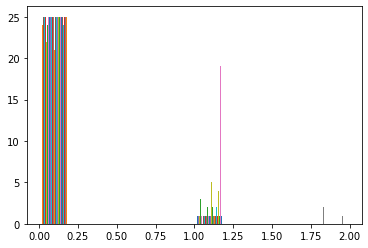

In [0]:
plt.hist(doc_array)

In [0]:
print("Loading frequency matrix...")
t0 = time()

frequency_matrix = pd.DataFrame(doc_array,index=cleaned_text,columns=count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))
frequency_matrix

Loading frequency matrix...
done in 0.001s.


,abl,abov,access,add,addit,age,android,applic,aspect,avail,background,calendar,chang,code,color,connect,contain,continu,creat,data,date,day,degre,delet,design,develop,developmentso,devic,diari,document,easi,edit,editor,extend,facebook,fast,flexibilityand,flexibilitywhich,form,good,...,password,per,perform,photo,post,postcard,program,quit,read,reread,respons,result,reusabl,run,save,second,secur,seven,share,social,sourc,stop,structur,system,thi,three,time,titl,toler,two,usabl,use,user,valu,version,way,weather,week,without,year
user creat new diari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add titl diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
user add weather diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
user add date diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add hour diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add second diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user save diari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add photo diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user read diari ha creat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user share diari form postcard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Loading Topic Visualisation...


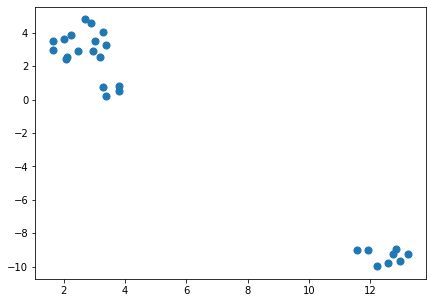

done in 3.324s.


In [0]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

visual_bow = doc_array
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_bow)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.show()

print("done in %0.3fs." % (time() - t0))

## Feature Item Set Mining TF-IDF

In [0]:
import numpy as np
import math

def l2_normalizer(vec):
    denom = np.sum([el**2 for el in vec])
    return [(el / math.sqrt(denom)) for el in vec]

doc_term_matrix_l2 = []
for vec in doc_array:
    doc_term_matrix_l2.append(l2_normalizer(vec))

print ('A regular old document term matrix: ') 
print (np.matrix(doc_array))
print ('\nA document term matrix with row-wise L2 norms of 1:')
print (np.matrix(doc_term_matrix_l2))

A regular old document term matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

A document term matrix with row-wise L2 norms of 1:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.30151134 0.         ... 0.         0.         0.30151134]
 [0.         0.         0.         ... 0.         0.         0.        ]]


(array([[100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
        [ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.],
        [ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.],
        [ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.],
        [ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.],
        [ 99.,   0.,

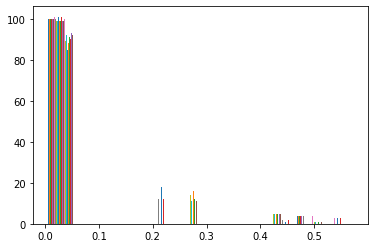

In [0]:
plt.hist(doc_term_matrix_l2)

In [0]:
import string #allows for format()
    
def build_lexicon(corpus):
    lexicon = set()
    for doc in corpus:
        lexicon.update([word for word in doc.split()])
    return lexicon

def freq(term, document):
  return document.split().count(term)

def numDocsContaining(word, doclist):
    doccount = 0
    for doc in doclist:
        if freq(word, doc) > 0:
            doccount +=1
    return doccount 

def idf(word, doclist):
    n_samples = len(doclist)
    df = numDocsContaining(word, doclist)
    return np.log(n_samples / 1+df)

vocabulary = build_lexicon(cleaned_text)
mydoclist = cleaned_text

my_idf_vector = [idf(word, mydoclist) for word in vocabulary]

print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']')
print ('The inverse document frequency vector is [' + ', '.join(format(freq, 'f') for freq in my_idf_vector) + ']')

Our vocabulary vector is [less, contain, applic, year, connect, post, introduc, new, thi, perform, avail, reusabl, kitkat, form, delet, reread, high, creat, save, run, share, use, addit, integr, hoursth, social, fast, lineinstagramand, age, develop, editor, postcard, abov, second, level, password, photo, code, week, interoperabilitybecaus, secur, edit, data, need, add, made, diari, three, flexibilityand, seven, hour, includ, without, developmentso, titl, day, one, color, degre, must, extend, easi, ha, version, aspect, time, maintain, chang, good, media, abl, background, calendar, access, continu, date, minut, program, flexibilitywhich, way, sourc, document, toler, two, user, stop, devic, respons, facebook, per, android, modul, structur, open, weather, read, oper, interfac, usabl, valu, quit, design, system, result]
The inverse document frequency vector is [3.295837, 3.295837, 3.496508, 3.295837, 3.295837, 3.295837, 3.295837, 3.332205, 3.401197, 3.295837, 3.295837, 3.295837, 3.295837, 3

In [0]:
import numpy as np

def build_idf_matrix(idf_vector):
    idf_mat = np.zeros((len(idf_vector), len(idf_vector)))
    np.fill_diagonal(idf_mat, idf_vector)
    return idf_mat

my_idf_matrix = build_idf_matrix(my_idf_vector)

In [0]:
doc_term_matrix_tfidf = []

#performing tf-idf matrix multiplication
for tf_vector in doc_array:
    doc_term_matrix_tfidf.append(np.dot(tf_vector, my_idf_matrix))

#normalizing
doc_term_matrix_tfidf_l2 = []
for tf_vector in doc_term_matrix_tfidf:
    doc_term_matrix_tfidf_l2.append(l2_normalizer(tf_vector))
                                    
print (vocabulary)
print (np.matrix(doc_term_matrix_tfidf_l2))

# np.matrix() just to make it easier to look at

{'less', 'contain', 'applic', 'year', 'connect', 'post', 'introduc', 'new', 'thi', 'perform', 'avail', 'reusabl', 'kitkat', 'form', 'delet', 'reread', 'high', 'creat', 'save', 'run', 'share', 'use', 'addit', 'integr', 'hoursth', 'social', 'fast', 'lineinstagramand', 'age', 'develop', 'editor', 'postcard', 'abov', 'second', 'level', 'password', 'photo', 'code', 'week', 'interoperabilitybecaus', 'secur', 'edit', 'data', 'need', 'add', 'made', 'diari', 'three', 'flexibilityand', 'seven', 'hour', 'includ', 'without', 'developmentso', 'titl', 'day', 'one', 'color', 'degre', 'must', 'extend', 'easi', 'ha', 'version', 'aspect', 'time', 'maintain', 'chang', 'good', 'media', 'abl', 'background', 'calendar', 'access', 'continu', 'date', 'minut', 'program', 'flexibilitywhich', 'way', 'sourc', 'document', 'toler', 'two', 'user', 'stop', 'devic', 'respons', 'facebook', 'per', 'android', 'modul', 'structur', 'open', 'weather', 'read', 'oper', 'interfac', 'usabl', 'valu', 'quit', 'design', 'system', 

In [0]:
hasil_tfidf = np.matrix(doc_term_matrix_tfidf_l2)
print (hasil_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.30060309 0.         ... 0.         0.         0.30060309]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [0]:
print("Loading frequency matrix...")
t0 = time()

frequency_TFIDF = pd.DataFrame(hasil_tfidf,index=cleaned_text,columns=count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))
frequency_TFIDF

Loading frequency matrix...
done in 0.001s.


,abl,abov,access,add,addit,age,android,applic,aspect,avail,background,calendar,chang,code,color,connect,contain,continu,creat,data,date,day,degre,delet,design,develop,developmentso,devic,diari,document,easi,edit,editor,extend,facebook,fast,flexibilityand,flexibilitywhich,form,good,...,password,per,perform,photo,post,postcard,program,quit,read,reread,respons,result,reusabl,run,save,second,secur,seven,share,social,sourc,stop,structur,system,thi,three,time,titl,toler,two,usabl,use,user,valu,version,way,weather,week,without,year
user creat new diari,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.502736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.502736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user add titl diari,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.504121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user add weather diari,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.504121,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000
user add date diari,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.504121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user add hour diari,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

(array([[25.,  0.,  0., ...,  0.,  0.,  0.],
        [24.,  0.,  0., ...,  0.,  0.,  0.],
        [25.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [25.,  0.,  0., ...,  0.,  0.,  0.],
        [25.,  0.,  0., ...,  0.,  0.,  0.],
        [25.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0.        , 0.0581574 , 0.11631481, 0.17447221, 0.23262962,
        0.29078702, 0.34894443, 0.40710183, 0.46525924, 0.52341664,
        0.58157404]),
 <a list of 104 Lists of Patches objects>)

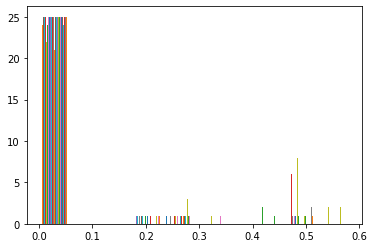

In [0]:
plt.hist(hasil_tfidf)

Loading Topic Visualisation...


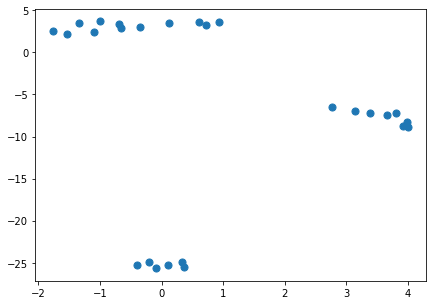

done in 0.361s.


In [0]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

visual_tfidf = hasil_tfidf 
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_tfidf)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.show()

print("done in %0.3fs." % (time() - t0))

## Feature Item Set Combination & Standrization

In [0]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
X = np.array(visual_tfidf[0:])
Y = np.array(visual_tfidf)

In [0]:
# pairwise_distances(X, Y, metric='manhattan')
# pairwise_distances(X, metric='manhattan')
cosine_similaritas = pairwise_kernels(X, Y, metric='linear')
cosine_similaritas

array([[1.        , 0.50137736, 0.50137736, 0.50137736, 0.50137736,
        0.50137736, 0.5784091 , 0.49866752, 0.67401419, 0.44869316,
        0.29237815, 0.22680846, 0.22680846, 0.5784091 , 0.66971595,
        0.43960757, 0.2459596 , 0.        , 0.        , 0.13039543,
        0.42385628, 0.        , 0.        , 0.        , 0.15279153,
        0.        ],
       [0.50137736, 1.        , 0.75137926, 0.75137926, 0.75137926,
        0.75137926, 0.58000246, 0.74731821, 0.44893846, 0.44992919,
        0.29318357, 0.22743325, 0.22743325, 0.58000246, 0.44607555,
        0.44081857, 0.24663715, 0.        , 0.        , 0.13075463,
        0.21251194, 0.        , 0.        , 0.        , 0.15321243,
        0.        ],
       [0.50137736, 0.75137926, 1.        , 0.75137926, 0.75137926,
        0.75137926, 0.58000246, 0.74731821, 0.44893846, 0.44992919,
        0.29318357, 0.22743325, 0.22743325, 0.58000246, 0.44607555,
        0.44081857, 0.24663715, 0.        , 0.        , 0.13075463,
      

(array([[ 6.,  2.,  4.,  0.,  4.,  7.,  2.,  0.,  0.,  1.],
        [ 6.,  2.,  5.,  0.,  4.,  3.,  0.,  5.,  0.,  1.],
        [ 6.,  2.,  5.,  0.,  4.,  3.,  0.,  5.,  0.,  1.],
        [ 6.,  2.,  5.,  0.,  4.,  3.,  0.,  5.,  0.,  1.],
        [ 5.,  3.,  5.,  0.,  4.,  3.,  0.,  5.,  0.,  1.],
        [ 5.,  3.,  5.,  0.,  4.,  3.,  0.,  5.,  0.,  1.],
        [ 6.,  2.,  4.,  0.,  0., 11.,  2.,  0.,  0.,  1.],
        [ 6.,  2.,  5.,  0.,  5.,  2.,  0.,  5.,  0.,  1.],
        [ 6.,  2.,  4.,  2.,  7.,  2.,  1.,  1.,  0.,  1.],
        [ 6.,  2.,  2.,  2., 10.,  3.,  0.,  0.,  0.,  1.],
        [ 7.,  3., 10.,  1.,  0.,  3.,  1.,  0.,  0.,  1.],
        [ 8.,  3., 11.,  0.,  1.,  1.,  0.,  0.,  1.,  1.],
        [ 8.,  3., 11.,  0.,  1.,  1.,  0.,  0.,  1.,  1.],
        [ 6.,  2.,  4.,  1.,  0., 11.,  1.,  0.,  0.,  1.],
        [ 6.,  2.,  4.,  3.,  6.,  2.,  1.,  1.,  0.,  1.],
        [ 6.,  5.,  1.,  3.,  8.,  2.,  0.,  0.,  0.,  1.],
        [ 8.,  3., 13.,  0.,  1.,  0.,  

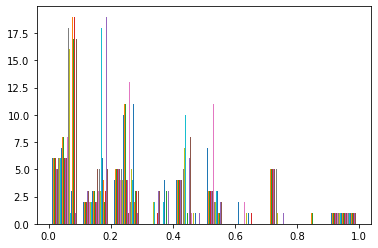

In [0]:
plt.hist(cosine_similaritas)

## Standarized Feature Item Set

In [0]:
print("Loading frequency matrix...")
t0 = time()

frequency_cosine = pd.DataFrame(cosine_similaritas, index=dataset2['ID'],columns=dataset2['ID'])
print("done in %0.3fs." % (time() - t0))
frequency_cosine

Loading frequency matrix...
done in 0.001s.


ID,F01,F02,F03,F04,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,NF01,NF02,NF03,NF04,NF05,NF06,NF07,NF08,NF09
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
F01,1.000000,0.501377,0.501377,0.501377,0.501377,0.501377,0.578409,0.498668,0.674014,0.448693,0.292378,0.226808,0.226808,0.578409,0.669716,0.439608,0.245960,0.000000,0.000000,0.130395,0.423856,0.000000,0.000000,0.000000,0.152792,0.000000
F02,0.501377,1.000000,0.751379,0.751379,0.751379,0.751379,0.580002,0.747318,0.448938,0.449929,0.293184,0.227433,0.227433,0.580002,0.446076,0.440819,0.246637,0.000000,0.000000,0.130755,0.212512,0.000000,0.000000,0.000000,0.153212,0.000000
F03,0.501377,0.751379,1.000000,0.751379,0.751379,0.751379,0.580002,0.747318,0.448938,0.449929,0.293184,0.227433,0.227433,0.580002,0.446076,0.440819,0.246637,0.000000,0.000000,0.130755,0.212512,0.000000,0.000000,0.000000,0.153212,0.000000
F04,0.501377,0.751379,0.751379,1.000000,0.751379,0.751379,0.580002,0.747318,0.448938,0.449929,0.293184,0.227433,0.227433,0.580002,0.446076,0.440819,0.246637,0.000000,0.000000,0.130755,0.212512,0.000000,0.000000,0.000000,0.153212,0.000000
F06,0.501377,0.751379,0.751379,0.751379,1.000000,0.751379,0.580002,0.747318,0.448938,0.449929,0.293184,0.227433,0.227433,0.580002,0.446076,0.440819,0.246637,0.110304,0.000000,0.130755,0.212512,0.000000,0.000000,0.000000,0.153212,0.000000
F07,0.501377,0.751379,0.751379,0.751379,0.751379,1.000000,0.580002,0.747318,0.448938,0.449929,0.293184,0.227433,0.227433,0.580002,0.446076,0.440819,0.246637,0.000000,0.000000,0.130755,0.212512,0.123828,0.000000,0.000000,0.153212,0.000000
F08,0.578409,0.580002,0.580002,0.580002,0.580002,0.580002,1.000000,0.576868,0.517913,0.519056,0.669114,0.262376,0.262376,0.669114,0.514611,0.508546,0.284531,0.000000,0.000000,0.150844,0.245162,0.000000,0.000000,0.000000,0.176752,0.000000
F09,0.498668,0.747318,0.747318,0.747318,0.747318,0.747318,0.576868,1.000000,0.446512,0.447497,0.291599,0.226204,0.226204,0.576868,0.443665,0.438436,0.245304,0.000000,0.000000,0.130048,0.211363,0.000000,0.000000,0.000000,0.152384,0.000000
F10,0.674014,0.448938,0.448938,0.448938,0.448938,0.448938,0.517913,0.446512,1.000000,0.401764,0.261798,0.203087,0.203087,0.517913,0.796647,0.393629,0.220235,0.098496,0.000000,0.116757,0.379525,0.000000,0.000000,0.000000,0.136811,0.000000


Loading Topic Visualisation...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


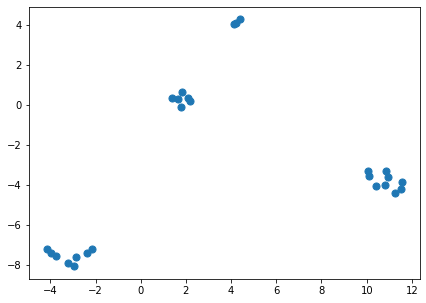

In [0]:
import umap

print("Loading Topic Visualisation...")
# t0 = time()

visual_cosine = cosine_similaritas
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_cosine)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.show()

# print("done in %0.3fs." % (time() - t0))

### Cluster (BOW, TF-IDF, Cosine)

In [0]:
import numpy as np
X = np.array(hasil_tfidf)
y = np.array(cosine_similaritas)

In [0]:
print("Loading Data X & Y...")
t0 = time()

print("X", X, "\n")
print("Y", y, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Data X & Y...
X [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.30060309 0.         ... 0.         0.         0.30060309]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

Y [[1.         0.50137736 0.50137736 0.50137736 0.50137736 0.50137736
  0.5784091  0.49866752 0.67401419 0.44869316 0.29237815 0.22680846
  0.22680846 0.5784091  0.66971595 0.43960757 0.2459596  0.
  0.         0.13039543 0.42385628 0.         0.         0.
  0.15279153 0.        ]
 [0.50137736 1.         0.75137926 0.75137926 0.75137926 0.75137926
  0.58000246 0.74731821 0.44893846 0.44992919 0.29318357 0.22743325
  0.22743325 0.58000246 0.44607555 0.44081857 0.24663715 0.
  0.         0.13075463 0.21251194 0.         0.   

In [0]:
from sklearn.cluster import KMeans

print("Loading Kmeans...")
t0 = time()
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
print(kmeans.fit(X))

print("done in %0.3fs." % (time() - t0))

Loading Kmeans...
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.023s.


In [0]:
print("Loading Data Correction...")
t0 = time()

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i].all():
        correct += 1

print(correct/len(X))

print("done in %0.3fs." % (time() - t0))

Loading Data Correction...
0.3076923076923077
done in 0.017s.


In [0]:
from sklearn.preprocessing import MinMaxScaler

print("Loading X Scaled...")
t0 = time()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(y)

print(X_scaled)

print("done in %0.3fs." % (time() - t0))

Loading X Scaled...
[[1.         0.50137736 0.50137736 0.50137736 0.50137736 0.50137736
  0.5784091  0.49866752 0.67401419 0.44869316 0.29237815 0.22680846
  0.22680846 0.5784091  0.66971595 0.43960757 0.2459596  0.
  0.         0.13039543 0.39647107 0.         0.         0.
  0.15279153 0.        ]
 [0.50137736 1.         0.75137926 0.75137926 0.75137926 0.75137926
  0.58000246 0.74731821 0.44893846 0.44992919 0.29318357 0.22743325
  0.22743325 0.58000246 0.44607555 0.44081857 0.24663715 0.
  0.         0.13075463 0.17508113 0.         0.         0.
  0.15321243 0.        ]
 [0.50137736 0.75137926 1.         0.75137926 0.75137926 0.75137926
  0.58000246 0.74731821 0.44893846 0.44992919 0.29318357 0.22743325
  0.22743325 0.58000246 0.44607555 0.44081857 0.24663715 0.
  0.         0.13075463 0.17508113 0.         0.         0.
  0.15321243 0.        ]
 [0.50137736 0.75137926 0.75137926 1.         0.75137926 0.75137926
  0.58000246 0.74731821 0.44893846 0.44992919 0.29318357 0.22743325
 

Loading Topic Visualisation...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


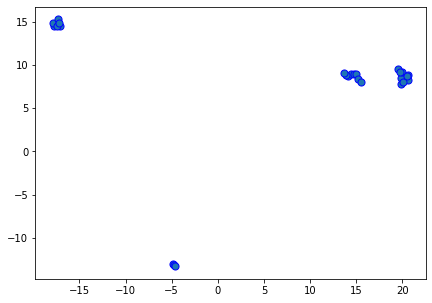

done in 0.216s.


In [0]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

kmeans_ontology = X_scaled
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(kmeans_ontology)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors='Blue')
plt.show()

print("done in %0.3fs." % (time() - t0))

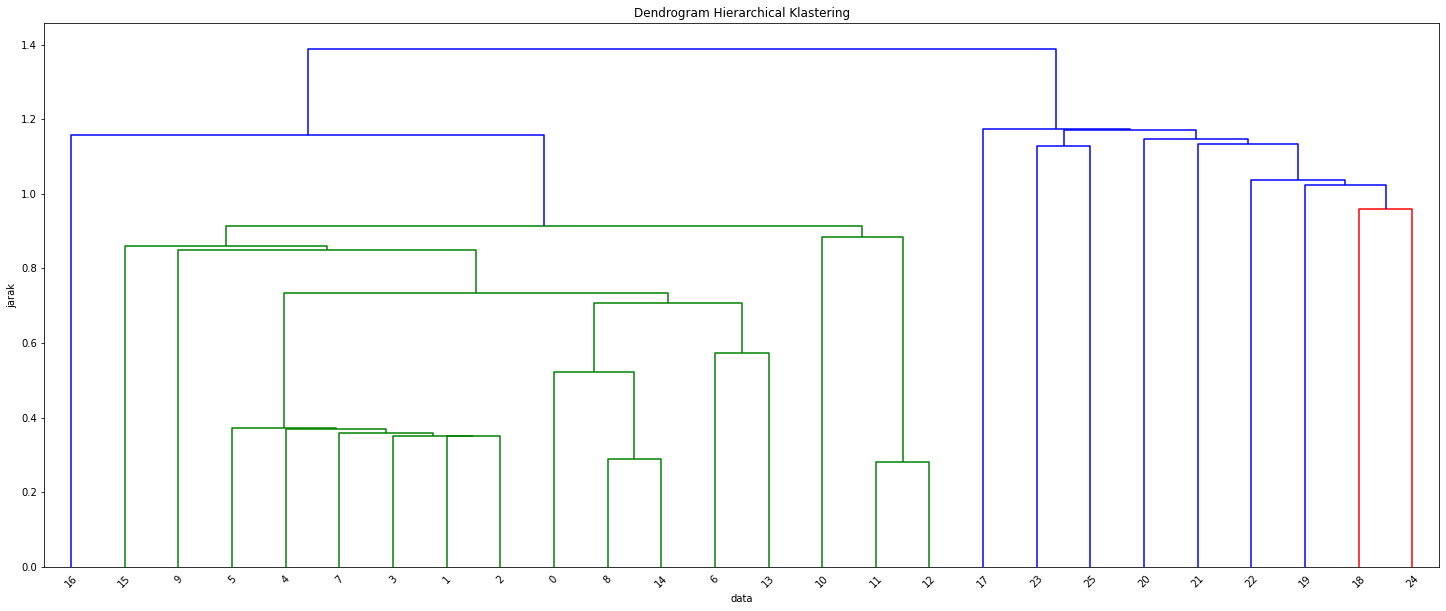

In [0]:
# import library
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#buat array 2D ke dalam variabel x. Data ini yang akan kita klaster.
x = np.array(kmeans_ontology)
#lakukan hierachical klastering
Z = linkage(x)

#plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Dendrogram Hierarchical Klastering')
plt.xlabel('data')
plt.ylabel('jarak')
dendrogram(Z)
plt.show()

## Document Vector

In [0]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
# corpus_raw = cleaned_text
# hasil_lower = []
# hasil_spliting = []
# hasil_set = []
# # hasil_union = []
# for n in corpus_raw:
#     hasil_lower.append(n.lower())
#     hasil_spliting.append(n.lower().split())
#     hasil_set.append(set(n.lower().split()))
#     # hasil_union.append(set(n.lower().split()).union(set(n.lower().split())))

In [0]:
# # # hasil_lower
# hasil_spliting
# # hasil_set

In [0]:
# kata1 = set(hasil_spliting[0])
# kata2 = set(hasil_spliting[1])
# kata3 = set(hasil_spliting[2])
# kata4 = set(hasil_spliting[3])
# kata5 = set(hasil_spliting[4])
# kata6 = set(hasil_spliting[5])
# kata7 = set(hasil_spliting[6])
# kata8 = set(hasil_spliting[7])
# kata9 = set(hasil_spliting[8])
# kata10 = set(hasil_spliting[9])
# kata11 = set(hasil_spliting[10])
# kata12 = set(hasil_spliting[11])
# kata13 = set(hasil_spliting[12])
# kata14 = set(hasil_spliting[13])
# kata15 = set(hasil_spliting[14])
# kata16 = set(hasil_spliting[15])
# kata17 = set(hasil_spliting[16])
# kata18 = set(hasil_spliting[17])
# kata19 = set(hasil_spliting[18])
# kata20 = set(hasil_spliting[19])
# kata21 = set(hasil_spliting[20])
# kata22 = set(hasil_spliting[21])
# kata23 = set(hasil_spliting[22])
# kata24 = set(hasil_spliting[23])
# kata25 = set(hasil_spliting[24])
# kata26 = set(hasil_spliting[25])

# katasemua = set(kata1).union(set(kata2)).union(set(kata3)).union(set(kata4)).union(set(kata5)).union(set(kata6)).union(set(kata7)).union(set(kata8)).union(set(kata9)).union(set(kata10)).union(set(kata11)).union(set(kata12)).union(set(kata13)).union(set(kata14)).union(set(kata15)).union(set(kata16)).union(set(kata17)).union(set(kata18)).union(set(kata19)).union(set(kata20)).union(set(kata21)).union(set(kata22)).union(set(kata23)).union(set(kata24)).union(set(kata25)).union(set(kata26))
# print(katasemua)

In [0]:
# len(katasemua)
len(count_vector.get_feature_names())

104

In [0]:
word2int = {}
int2word = {}
# vocab_size = len(katasemua)
vocab_size = len(count_vector.get_feature_names())
print(vocab_size)

104


In [0]:
# for i,word in enumerate(katasemua):
for i,word in enumerate(count_vector.get_feature_names()):
    word2int[word] = i
    int2word[i] = word

In [0]:
word2int
# int2word

{'abl': 0,
 'abov': 1,
 'access': 2,
 'add': 3,
 'addit': 4,
 'age': 5,
 'android': 6,
 'applic': 7,
 'aspect': 8,
 'avail': 9,
 'background': 10,
 'calendar': 11,
 'chang': 12,
 'code': 13,
 'color': 14,
 'connect': 15,
 'contain': 16,
 'continu': 17,
 'creat': 18,
 'data': 19,
 'date': 20,
 'day': 21,
 'degre': 22,
 'delet': 23,
 'design': 24,
 'develop': 25,
 'developmentso': 26,
 'devic': 27,
 'diari': 28,
 'document': 29,
 'easi': 30,
 'edit': 31,
 'editor': 32,
 'extend': 33,
 'facebook': 34,
 'fast': 35,
 'flexibilityand': 36,
 'flexibilitywhich': 37,
 'form': 38,
 'good': 39,
 'ha': 40,
 'high': 41,
 'hour': 42,
 'hoursth': 43,
 'includ': 44,
 'integr': 45,
 'interfac': 46,
 'interoperabilitybecaus': 47,
 'introduc': 48,
 'kitkat': 49,
 'less': 50,
 'level': 51,
 'lineinstagramand': 52,
 'made': 53,
 'maintain': 54,
 'media': 55,
 'minut': 56,
 'modul': 57,
 'must': 58,
 'need': 59,
 'new': 60,
 'one': 61,
 'open': 62,
 'oper': 63,
 'password': 64,
 'per': 65,
 'perform': 66,
 

In [0]:
raw_sentences = cleaned_text
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [0]:
raw_sentences

['user creat new diari',
 'user add titl diari',
 'user add weather diari',
 'user add date diari',
 'user add hour diari',
 'user add second diari',
 'user save diari',
 'user add photo diari',
 'user read diari ha creat',
 'user share diari form postcard',
 'user save postcard',
 'user chang postcard background color',
 'user chang color post postcard',
 'user delet diari',
 'user edit diari ha creat',
 'user open calendar contain diari',
 'system open diari editor',
 'applic ha high level avail oper continu seven day per week hour per day without stop',
 'applic must high degre flexibilitywhich must abl run devic use kitkat version android oper system abov',
 'thi applic must high level integr data secur includ secur form password user',
 'thi applic ha high usabl aspect easi use interfac applic introduc two hoursth new user creat diari less three minut',
 'thi applic must respons time valu quit good fast access extend perform result toler three second',
 'applic must high level int

In [0]:
sentences

[['user', 'creat', 'new', 'diari'],
 ['user', 'add', 'titl', 'diari'],
 ['user', 'add', 'weather', 'diari'],
 ['user', 'add', 'date', 'diari'],
 ['user', 'add', 'hour', 'diari'],
 ['user', 'add', 'second', 'diari'],
 ['user', 'save', 'diari'],
 ['user', 'add', 'photo', 'diari'],
 ['user', 'read', 'diari', 'ha', 'creat'],
 ['user', 'share', 'diari', 'form', 'postcard'],
 ['user', 'save', 'postcard'],
 ['user', 'chang', 'postcard', 'background', 'color'],
 ['user', 'chang', 'color', 'post', 'postcard'],
 ['user', 'delet', 'diari'],
 ['user', 'edit', 'diari', 'ha', 'creat'],
 ['user', 'open', 'calendar', 'contain', 'diari'],
 ['system', 'open', 'diari', 'editor'],
 ['applic',
  'ha',
  'high',
  'level',
  'avail',
  'oper',
  'continu',
  'seven',
  'day',
  'per',
  'week',
  'hour',
  'per',
  'day',
  'without',
  'stop'],
 ['applic',
  'must',
  'high',
  'degre',
  'flexibilitywhich',
  'must',
  'abl',
  'run',
  'devic',
  'use',
  'kitkat',
  'version',
  'android',
  'oper',
  '

In [0]:
data = []
WINDOW_SIZE = 2

def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
    
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [0]:
data

[['user', 'creat'],
 ['user', 'new'],
 ['creat', 'user'],
 ['creat', 'new'],
 ['creat', 'diari'],
 ['new', 'user'],
 ['new', 'creat'],
 ['new', 'diari'],
 ['diari', 'creat'],
 ['diari', 'new'],
 ['user', 'add'],
 ['user', 'titl'],
 ['add', 'user'],
 ['add', 'titl'],
 ['add', 'diari'],
 ['titl', 'user'],
 ['titl', 'add'],
 ['titl', 'diari'],
 ['diari', 'add'],
 ['diari', 'titl'],
 ['user', 'add'],
 ['user', 'weather'],
 ['add', 'user'],
 ['add', 'weather'],
 ['add', 'diari'],
 ['weather', 'user'],
 ['weather', 'add'],
 ['weather', 'diari'],
 ['diari', 'add'],
 ['diari', 'weather'],
 ['user', 'add'],
 ['user', 'date'],
 ['add', 'user'],
 ['add', 'date'],
 ['add', 'diari'],
 ['date', 'user'],
 ['date', 'add'],
 ['date', 'diari'],
 ['diari', 'add'],
 ['diari', 'date'],
 ['user', 'add'],
 ['user', 'hour'],
 ['add', 'user'],
 ['add', 'hour'],
 ['add', 'diari'],
 ['hour', 'user'],
 ['hour', 'add'],
 ['hour', 'diari'],
 ['diari', 'add'],
 ['diari', 'hour'],
 ['user', 'add'],
 ['user', 'second'

In [0]:
x_train = [] 
y_train = [] 
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

In [0]:
print("X Train", x_train)
print("\n")
print("y Train", y_train)

Streaming output truncated to the last 5000 lines.
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 

In [0]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print("X Train", x_train)
print("\n")
print("y Train", y_train)

X Train [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


y Train [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
print(x_train.shape, y_train.shape)

(666, 104) (666, 104)


In [0]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))
print("X", x)
print("y label", y_label)

X Tensor("Placeholder:0", shape=(?, 104), dtype=float32)
y label Tensor("Placeholder_1:0", shape=(?, 104), dtype=float32)


In [0]:
EMBEDDING_DIM = 5 
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1), b1)
print("W1", W1)
print("B1", b1)
print("hidden representation", hidden_representation)

W1 <tf.Variable 'Variable:0' shape=(104, 5) dtype=float32_ref>
B1 <tf.Variable 'Variable_1:0' shape=(5,) dtype=float32_ref>
hidden representation Tensor("Add:0", shape=(?, 5), dtype=float32)


In [0]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))
print("W2", W2)
print("B2", b2)
print("prediction", prediction)

W2 <tf.Variable 'Variable_2:0' shape=(5, 104) dtype=float32_ref>
B2 <tf.Variable 'Variable_3:0' shape=(104,) dtype=float32_ref>
prediction Tensor("Softmax:0", shape=(?, 104), dtype=float32)


In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

Streaming output truncated to the last 5000 lines.
loss is :  2.9722216
loss is :  2.9720643
loss is :  2.9719071
loss is :  2.97175
loss is :  2.971593
loss is :  2.971436
loss is :  2.971279
loss is :  2.9711215
loss is :  2.970965
loss is :  2.970808
loss is :  2.970651
loss is :  2.9704943
loss is :  2.9703379
loss is :  2.970181
loss is :  2.970024
loss is :  2.9698675
loss is :  2.9697113
loss is :  2.9695547
loss is :  2.969398
loss is :  2.9692414
loss is :  2.9690852
loss is :  2.9689288
loss is :  2.9687726
loss is :  2.9686165
loss is :  2.9684598
loss is :  2.9683042
loss is :  2.968148
loss is :  2.9679916
loss is :  2.9678357
loss is :  2.9676797
loss is :  2.967524
loss is :  2.9673681
loss is :  2.967212
loss is :  2.9670565
loss is :  2.966901
loss is :  2.9667454
loss is :  2.9665895
loss is :  2.9664338
loss is :  2.966278
loss is :  2.9661229
loss is :  2.9659674
loss is :  2.965812
loss is :  2.965656
loss is :  2.9655013
loss is :  2.9653459
loss is :  2.9651906
l

In [0]:
print(sess.run(W1))
print(sess.run(b1))

[[ 1.87558937e+00  1.76416469e+00 -9.22823727e-01 -1.32835662e+00
  -1.45177829e+00]
 [-4.23217058e-01  3.24175549e+00  2.92465240e-01  9.95681763e-01
   1.11809814e+00]
 [-8.22554231e-01 -6.90048754e-01 -1.56241453e+00 -2.99111843e+00
  -8.56403053e-01]
 [-1.47438824e+00 -9.63112861e-02  7.80746937e-01 -9.75049064e-02
  -1.56816292e+00]
 [-4.32544202e-01 -6.42858267e-01 -1.74216294e+00  1.42446780e+00
   1.32891703e+00]
 [-7.09762037e-01  1.42671621e+00  7.82784045e-01  2.68938452e-01
  -1.30801603e-01]
 [-7.07138598e-01  2.22512335e-01  1.06362128e+00  8.38102221e-01
   1.89775658e+00]
 [ 6.17640376e-01 -3.68765652e-01  7.09758699e-01 -8.93305004e-01
   8.68207395e-01]
 [ 1.44810450e+00 -1.11728394e+00  3.50671589e-01  9.54644978e-01
   4.30610746e-01]
 [ 5.37980616e-01  1.36875749e+00  1.09619176e+00  1.41076100e+00
   1.41718829e+00]
 [-5.56824803e-01 -6.22919559e-01 -1.34405077e+00  1.31006241e+00
  -8.34665358e-01]
 [-1.89160061e+00 -1.98358893e+00 -1.61067396e-01 -9.40257385e-02

In [0]:
vectors = sess.run(W1 + b1)
vectors

array([[ 1.90961266e+00,  2.65918970e+00, -6.70903683e-01,
        -5.72581649e-01, -1.64550388e+00],
       [-3.89193833e-01,  4.13678074e+00,  5.44385314e-01,
         1.75145674e+00,  9.24372554e-01],
       [-7.88531005e-01,  2.04976320e-01, -1.31049442e+00,
        -2.23534346e+00, -1.05012870e+00],
       [-1.44036496e+00,  7.98713803e-01,  1.03266704e+00,
         6.58270061e-01, -1.76188850e+00],
       [-3.98520976e-01,  2.52166808e-01, -1.49024284e+00,
         2.18024278e+00,  1.13519144e+00],
       [-6.75738811e-01,  2.32174134e+00,  1.03470409e+00,
         1.02471340e+00, -3.24527204e-01],
       [-6.73115373e-01,  1.11753738e+00,  1.31554139e+00,
         1.59387720e+00,  1.70403099e+00],
       [ 6.51663601e-01,  5.26259422e-01,  9.61678743e-01,
        -1.37530029e-01,  6.74481809e-01],
       [ 1.48212779e+00, -2.22258866e-01,  6.02591634e-01,
         1.71041989e+00,  2.36885160e-01],
       [ 5.72003841e-01,  2.26378250e+00,  1.34811187e+00,
         2.16653585e+00

Loading Topic Visualisation...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


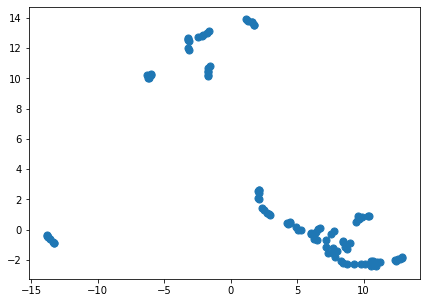

In [0]:
import umap

print("Loading Topic Visualisation...")
# t0 = time()

visual_vector = vectors
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_vector)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.show()

# print("done in %0.3fs." % (time() - t0))

In [0]:
# print(katasemua)
print(count_vector.get_feature_names())

['abl', 'abov', 'access', 'add', 'addit', 'age', 'android', 'applic', 'aspect', 'avail', 'background', 'calendar', 'chang', 'code', 'color', 'connect', 'contain', 'continu', 'creat', 'data', 'date', 'day', 'degre', 'delet', 'design', 'develop', 'developmentso', 'devic', 'diari', 'document', 'easi', 'edit', 'editor', 'extend', 'facebook', 'fast', 'flexibilityand', 'flexibilitywhich', 'form', 'good', 'ha', 'high', 'hour', 'hoursth', 'includ', 'integr', 'interfac', 'interoperabilitybecaus', 'introduc', 'kitkat', 'less', 'level', 'lineinstagramand', 'made', 'maintain', 'media', 'minut', 'modul', 'must', 'need', 'new', 'one', 'open', 'oper', 'password', 'per', 'perform', 'photo', 'post', 'postcard', 'program', 'quit', 'read', 'reread', 'respons', 'result', 'reusabl', 'run', 'save', 'second', 'secur', 'seven', 'share', 'social', 'sourc', 'stop', 'structur', 'system', 'thi', 'three', 'time', 'titl', 'toler', 'two', 'usabl', 'use', 'user', 'valu', 'version', 'way', 'weather', 'week', 'without'

In [0]:
print(vectors[ word2int['abl'] ])

[ 1.9096127   2.6591897  -0.6709037  -0.57258165 -1.6455039 ]


In [0]:
print(vectors[ word2int['abov'] ])

[-0.38919383  4.1367807   0.5443853   1.7514567   0.92437255]


In [0]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [0]:
print(int2word[find_closest(word2int['abl'], vectors)])

run


In [0]:
print(euclidean_dist(vectors[ word2int['abl'] ], vectors[ word2int['abov'] ]))

4.5771317


In [0]:
print(euclidean_dist(vectors[ word2int['abl'] ], vectors[ word2int['run'] ]))

1.6448159


In [0]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
X = np.array(vectors[0:])
Y = np.array(vectors)

In [0]:
cosine_vector = pairwise_distances(X, Y, metric='manhattan')
# pairwise_distances(X, metric='manhattan')
# cosine_vector = pairwise_kernels(X, Y, metric='linear')
cosine_vector

array([[ 0.        ,  9.88560134,  8.05008477, ...,  7.62451404,
         8.76380982,  4.20019335],
       [ 9.88560134,  0.        , 12.14732277, ...,  8.22465527,
         8.58477478,  5.73636979],
       [ 8.05008477, 12.14732277,  0.        , ...,  7.23686981,
         6.18042512,  6.41095299],
       ...,
       [ 7.62451404,  8.22465527,  7.23686981, ...,  0.        ,
         2.73601286,  4.90231538],
       [ 8.76380982,  8.58477478,  6.18042512, ...,  2.73601286,
         0.        ,  6.04161115],
       [ 4.20019335,  5.73636979,  6.41095299, ...,  4.90231538,
         6.04161115,  0.        ]])

In [0]:
print("Loading frequency matrix...")
t0 = time()

frequency_vector = pd.DataFrame(cosine_vector, index=count_vector.get_feature_names(),columns=count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))
frequency_vector

Loading frequency matrix...
done in 0.002s.


,abl,abov,access,add,addit,age,android,applic,aspect,avail,background,calendar,chang,code,color,connect,contain,continu,creat,data,date,day,degre,delet,design,develop,developmentso,devic,diari,document,easi,edit,editor,extend,facebook,fast,flexibilityand,flexibilitywhich,form,good,...,password,per,perform,photo,post,postcard,program,quit,read,reread,respons,result,reusabl,run,save,second,secur,seven,share,social,sourc,stop,structur,system,thi,three,time,titl,toler,two,usabl,use,user,valu,version,way,weather,week,without,year
abl,0.000000,9.885601,8.050085,8.261261,11.068015,7.546679,11.626819,7.778499,8.747819,9.360116,8.496257,9.845146,12.376805,12.317836,9.137293,5.928728,8.300588,6.530109,9.490289,10.074634,10.072785,6.909116,4.930840,10.342345,8.449516,11.374185,7.151048,4.513638,7.256178,7.699807,5.835590,10.067419,12.134853,6.095566,8.827056,7.636205,8.080379,5.895504,9.233285,8.592337,...,14.922314,5.068354,8.972506,8.890068,8.703529,9.258278,9.062523,8.108960,11.227391,10.748237,6.988126,9.658440,9.287941,3.203249,9.113840,9.021443,11.328438,8.535384,12.899918,5.777342,11.694281,5.946129,6.663184,7.658540,6.400819,7.164224,7.859282,10.198542,5.670481,6.080561,10.223702,5.823366,7.954602,6.190166,9.728391,6.761120,9.453971,7.624514,8.763810,4.200193
abov,9.885601,0.000000,12.147323,8.656968,6.568174,4.567546,5.011559,7.207550,7.017092,4.352092,7.901943,11.140960,9.709200,7.036290,9.595399,7.516526,9.813399,4.486701,8.586856,8.317084,7.163047,8.711073,7.234981,8.927732,6.157420,7.038487,5.207462,9.060304,7.392510,8.323308,9.042100,6.458169,10.344186,9.690706,6.437260,10.050718,6.435859,10.182822,7.607499,9.332523,...,7.991895,9.617746,8.818379,7.905189,7.893122,9.645837,7.213118,12.282672,6.524179,9.103368,10.466288,10.763460,5.910034,9.273749,7.752468,9.326400,11.776213,4.599786,7.813321,5.668533,8.410865,7.780017,7.695417,6.229357,7.699707,9.418366,10.206767,7.181027,8.829738,8.166467,7.413780,7.248209,8.057457,12.626743,4.152944,5.498666,6.936705,8.224655,8.584775,5.736370
access,8.050085,12.147323,0.000000,7.194106,7.217855,8.560414,10.237393,7.856075,9.843757,12.753418,4.874141,7.590516,7.901668,10.828959,5.421676,6.975758,6.045959,7.660622,8.921568,10.234164,8.608127,6.210334,10.852966,6.896966,7.671951,7.748869,10.477098,11.040357,7.199737,8.278320,7.797957,7.192880,10.161854,2.456616,9.241226,2.785654,8.742792,9.473724,7.406603,4.989632,...,11.476934,6.645843,4.410059,8.856909,5.555914,6.594514,8.974326,4.225172,8.941254,9.631660,5.795453,3.936921,12.437121,6.896328,6.173045,8.272925,12.166691,9.357317,9.454538,9.164656,11.978064,6.356166,10.010374,6.461631,9.233016,7.094217,7.409842,10.399693,4.832123,5.970777,11.575499,7.372795,9.269483,5.819983,9.942481,7.286745,9.282215,7.236870,6.180425,6.410953
add,8.261261,8.656968,7.194106,0.000000,8.530354,4.093495,5.770474,5.667642,7.424464,8.286499,5.710034,3.467514,7.755455,9.017124,4.641556,8.845873,3.030470,6.733933,4.700306,6.954720,3.684533,5.130938,7.199774,2.313854,7.813206,9.019321,7.821370,6.106632,2.665160,6.045284,7.103904,4.041855,6.314951,6.713321,7.128558,7.087527,4.275873,6.821907,4.736100,8.707890,...,7.838281,6.396890,4.630077,1.795033,5.922219,4.828037,9.193730,10.076169,5.278999,10.460270,10.260748,5.864230,8.172656,5.737214,3.317301,3.877641,8.887248,4.486432,6.025802,9.419421,10.354862,4.584856,10.229778,5.211940,8.880283,3.671341,10.001227,4.629106,4.263581,5.551475,8.907512,5.714083,5.272539,9.462220,5.475563,7.506149,3.047478,5.320502,5.410293,6.345988
addit,11.068015,6.568174,7.217855,8.530354,0.000000,7.486987,5.100954,6.554681,5.816038,5.922473,2.820319,9.014186,4.171585,4.064981,4.158894,9.327478,7.432864,4.945840,6.528231,7.116031,7.105905,8.144254,9.910765,7.708024,4.721071,0.857059,5.512919,11.984502,6.905252,7.122254,6.220760,5.238461,8.268633,7.443450,8.495831,4.853818,6.779345,10.514700,6.406445,4.651257,...,6.055202,11.479814,7.918754,8.812571,3.052277,4.981197,4.689927,7.012362,4.735328,3.913253,5.810211,9.543752,6.376701,9.316441,5.

Loading Topic Visualisation...


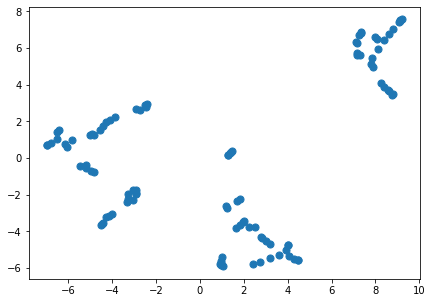

In [0]:
import umap

print("Loading Topic Visualisation...")
# t0 = time()

visual_cosinevector = cosine_vector
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_cosinevector)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.show()

# print("done in %0.3fs." % (time() - t0))

### Cluster (Document Vector)

In [0]:
import numpy as np
Xv = np.array(visual_vector)
yv = np.array(cosine_vector)

In [0]:
print("Loading Data X & Y...")
t0 = time()

print("X", Xv, "\n")
print("Y", yv, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Data X & Y...
X [[ 1.90961266e+00  2.65918970e+00 -6.70903683e-01 -5.72581649e-01
  -1.64550388e+00]
 [-3.89193833e-01  4.13678074e+00  5.44385314e-01  1.75145674e+00
   9.24372554e-01]
 [-7.88531005e-01  2.04976320e-01 -1.31049442e+00 -2.23534346e+00
  -1.05012870e+00]
 [-1.44036496e+00  7.98713803e-01  1.03266704e+00  6.58270061e-01
  -1.76188850e+00]
 [-3.98520976e-01  2.52166808e-01 -1.49024284e+00  2.18024278e+00
   1.13519144e+00]
 [-6.75738811e-01  2.32174134e+00  1.03470409e+00  1.02471340e+00
  -3.24527204e-01]
 [-6.73115373e-01  1.11753738e+00  1.31554139e+00  1.59387720e+00
   1.70403099e+00]
 [ 6.51663601e-01  5.26259422e-01  9.61678743e-01 -1.37530029e-01
   6.74481809e-01]
 [ 1.48212779e+00 -2.22258866e-01  6.02591634e-01  1.71041989e+00
   2.36885160e-01]
 [ 5.72003841e-01  2.26378250e+00  1.34811187e+00  2.16653585e+00
   1.22346270e+00]
 [-5.22801578e-01  2.72105515e-01 -1.09213066e+00  2.06583738e+00
  -1.02839088e+00]
 [-1.85757732e+00 -1.08856392e+00  9.0852

In [0]:
from sklearn.cluster import KMeans

print("Loading Kmeans...")
t0 = time()
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
print(kmeans.fit(Xv))

print("done in %0.3fs." % (time() - t0))

Loading Kmeans...
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.045s.


In [0]:
print("Loading Data Correction...")
t0 = time()

correct = 0
for i in range(len(X)):
    predict_me = np.array(Xv[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == yv[i].all():
        correct += 1

print(correct/len(Xv))

print("done in %0.3fs." % (time() - t0))

Loading Data Correction...
0.4326923076923077
done in 0.046s.


In [0]:
from sklearn.preprocessing import MinMaxScaler

print("Loading X Scaled...")
t0 = time()

scaler = MinMaxScaler()
X_scaledv = scaler.fit_transform(yv)

print(X_scaledv)

print("done in %0.3fs." % (time() - t0))

Loading X Scaled...
[[0.         0.78290984 0.61583699 ... 0.60943796 0.69551171 0.36571645]
 [0.66247107 0.         0.92927851 ... 0.65740808 0.68130316 0.49947339]
 [0.53946625 0.96203137 0.         ... 0.57845302 0.49048965 0.55821025]
 ...
 [0.51094716 0.65136792 0.55362549 ... 0.         0.2171349  0.42685115]
 [0.58729563 0.6798883  0.47280675 ... 0.21869329 0.         0.52605116]
 [0.28147064 0.4543032  0.49044229 ... 0.39184885 0.47947312 0.        ]]
done in 0.003s.


Loading Topic Visualisation...


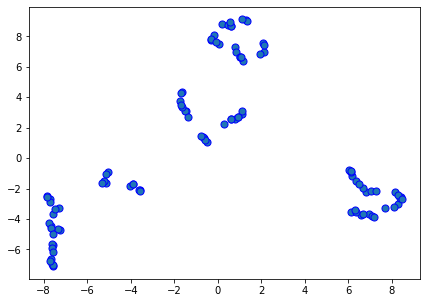

done in 0.337s.


In [0]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

kmeansvector_ontology = X_scaledv
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(kmeansvector_ontology)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors='Blue')
plt.show()

print("done in %0.3fs." % (time() - t0))

## Ontology Construction

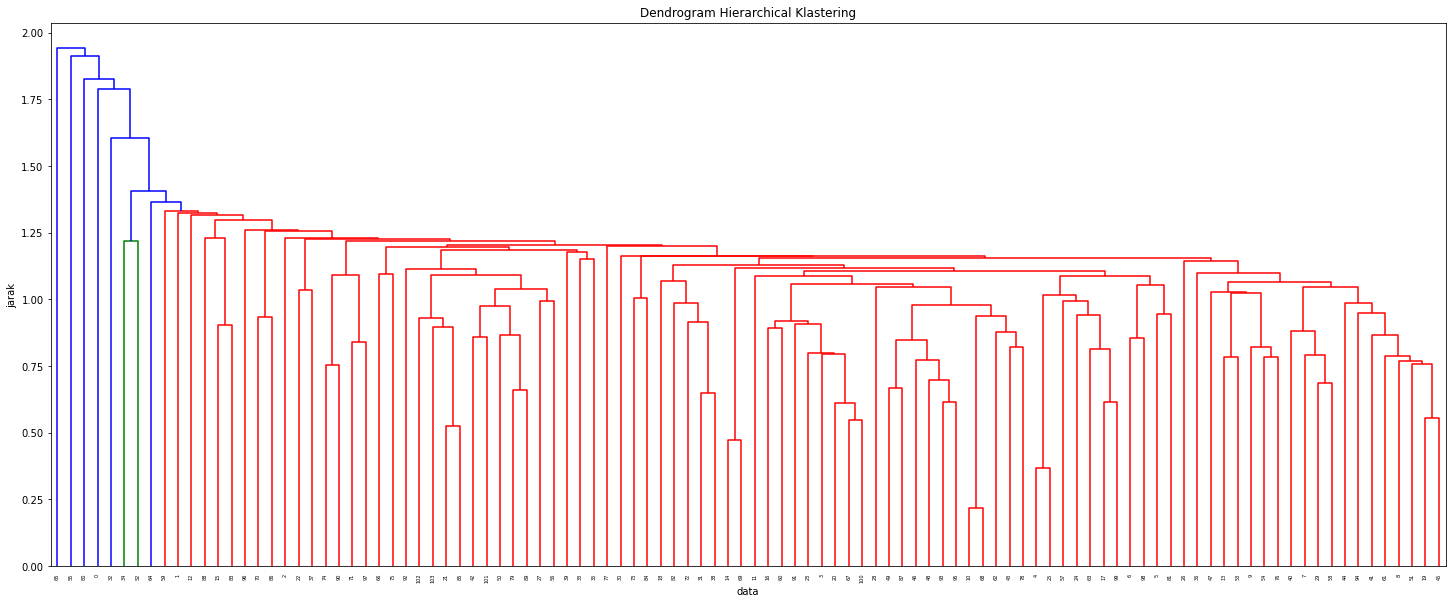

In [0]:
# import library
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#buat array 2D ke dalam variabel x. Data ini yang akan kita klaster.
x = np.array(kmeansvector_ontology)
#lakukan hierachical klastering
Z = linkage(x)

#plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Dendrogram Hierarchical Klastering')
plt.xlabel('data')
plt.ylabel('jarak')
dendrogram(Z)
plt.show()

### Splliting Data

In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xv, kmeansvector_ontology, test_size=0.3,random_state=109) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 5), (32, 5), (72, 104), (32, 104))

In [0]:
y_train = np.argmax(y_train, axis=1)

### Model Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_predLR = clf.predict(X_test)

# Decision Tree
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
y_predDT = Dt.predict(X_test)

# Decision Tree Regressor
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train, y_train)
y_predDTR = Dtr.predict(X_test)

# Gaussian Naive Bias
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predGNB = gnb.predict(X_test)

# random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predRFC = rfc.predict(X_test)

# random forest regressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
y_predRFR = rfr.predict(X_test)

# Support vector classifier
ppn = SVC(C=1, random_state = 0)
ppn.fit(X_train,y_train)
y_predSVC = ppn.predict(X_test)

# support vector regression
svm = SVR(C = 2, kernel = 'rbf', degree = 2)
svm.fit(X_train, y_train)
y_predSVR = svm.predict(X_test)

# k neearest neighbor classifier
Knn = KNeighborsClassifier(n_neighbors = 2, p =2, metric = 'minkowski')
Knn = Knn.fit(X_train,y_train)
y_predKNN = Knn.predict(X_test)

In [0]:
print("prediksi logistic regression", y_predLR)
print("prediksi Decision Tree", y_predDT)
print("prediksi Decision Tree Regression", y_predDTR)
print("prediksi Gaussian Naive Bias", y_predGNB)
print("prediksi random forest classifer", y_predRFC)
print("prediksi random forest regressor", y_predRFR)
print("prediksi support vector classifer", y_predSVC)
print("prediksi support vector regression", y_predSVR)
print("prediksi k nearest neighbor classifer", y_predKNN)

prediksi logistic regression [65 25 55 59 65 65 65 55 55 25 25 55 55  9 25 55 55 25 65 65  9 65 65 55
 97 55 65 65 65  9 25 55]
prediksi Decision Tree [65 57 55 59 80 27 55  9  2 25 25 59  2 27 52 55 59 57  2 65 27 65 12 55
 97 55  2 70 55 27 25 59]
prediksi Decision Tree Regression [65. 55. 55. 59. 75. 70. 65.  9. 83. 25. 97. 65. 83.  9. 52. 55. 59. 52.
 79. 65.  9. 65. 57. 55. 75. 55.  2. 79. 65. 27. 97.  9.]
prediksi Gaussian Naive Bias [65 57  9 59 80 55 65 55  7 25 25  7 55  9 57 65 59  9  2 65  9 65 12 55
  7 55 55 65 55  9 25 55]
prediksi random forest classifer [65 57 55 59 12 91 27 57  7 25 97 50 55  9 52 55 59 57  2 65 91 65 12 55
 97 55  2 70 55 27 97 55]
prediksi random forest regressor [57.78 32.41 33.13 53.6  43.47 58.62 42.31 47.34 23.76 33.21 62.09 37.71
 45.19 47.55 52.61 50.43 44.97 45.86 43.71 47.73 42.18 61.71 37.82 49.92
 59.2  45.76 30.58 50.09 52.29 50.73 63.67 38.12]
prediksi support vector classifer [65 57  9 59 55 65 27 55  7 25 25 50 55  9 55 55 59 55  2 65  

### Model Evaluation

In [0]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

actual = [65,25,55,59,65,65,65,55,55,25,25,55,55,9,25,55,55,25,65,65,9,65,65,55,97,55,65,65,65,9,25,55]
predicted = y_predSVC
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results,'\n') 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 

print ('Report : ')
print (classification_report(actual, predicted)) 

Confusion Matrix :
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 2 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 2 4 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [2 0 0 0 1 0 0 2 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]] 

Accuracy Score : 0.53125
Report : 
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.75      1.00      0.86         3
          25       1.00      0.33      0.50         6
          27       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         0
          52       0.00      0.00      0.00         0
          55       0.50      0.40      0.44        10
          57       0.00      0.00      0.00         0
          59       0.50      1.00      0.67         1
          65       1.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
